# Gas Price Prediction
author: "Suresh, Reinert and Mullick"

date: "4/6/2022"

This project focuses on analyzing the historical gas price trend and predict the future gas price. As we know, the prices at the pump started rising once the lockdowns were lifted and have spiraled faster since the start of the war. Our idea is to predict weekly gas prices using indicators like crude oil price, stocks, import/export etc.

The data source details are mentioned as follows.

Historical gas price - https://www.eia.gov/opendata/qb.php?sdid=PET.EMM_EPM0U_PTE_NUS_DPG.W

Crude oil spot price - https://www.eia.gov/opendata/qb.php?sdid=PET.RWTC.D

Stocks of gasoline - https://www.eia.gov/opendata/qb.php?sdid=PET.WGFSTUS1.W

Supply of gasoline - https://www.eia.gov/opendata/qb.php?sdid=PET.W_EPM0_VSD_NUS_DAYS.W

Refinery capacity - https://www.eia.gov/opendata/qb.php?sdid=PET.WPULEUS3.W

Crude oil exports - https://www.eia.gov/opendata/qb.php?sdid=PET.WCREXUS2.W

Crude oil imports - https://www.eia.gov/opendata/qb.php?sdid=PET.WCRIMUS2.W

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [60]:
#Import the gasoline price data
df_gasoline_price = pd.read_csv('data/U.S._All_Grades_Conventional_Retail_Gasoline_Prices_Weekly.csv', skiprows = 4)

In [61]:
#Rename columns to Gas_price_date and Gas_price_per_gallon
df_gasoline_price.rename(columns={'Week of': 'Gas_price_date', 'Series ID: PET.EMM_EPM0U_PTE_NUS_DPG.W Dollars per Gallon': 'Gas_price_per_gallon'}, inplace=True)

In [62]:
# To match date values from other sources, subtract three days from Gas_price_date
df_gasoline_price['Gas_price_date'] = pd.DatetimeIndex(df_gasoline_price['Gas_price_date'])
df_gasoline_price['Date'] = df_gasoline_price['Gas_price_date'] -  pd.to_timedelta(3, unit='d')

In [63]:
#Change date format to MM/DD/YYYY format for Date and Gas_price_date
df_gasoline_price['Date'] = df_gasoline_price['Date'].dt.strftime('%m/%d/%Y')
df_gasoline_price['Gas_price_date'] = df_gasoline_price['Gas_price_date'].dt.strftime('%m/%d/%Y')

In [64]:
df_gasoline_price.head(5)

,Gas_price_date,Gas_price_per_gallon,Date
0,04/04/2022,4.096,04/01/2022
1,03/28/2022,4.152,03/25/2022
2,03/21/2022,4.165,03/18/2022
3,03/14/2022,4.252,03/11/2022
4,03/07/2022,4.031,03/04/2022


In [65]:
#Import the crude oil spot price data
df_crude_spot_price = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB_Weekly.csv', skiprows = 4)

In [66]:
#Rename columns to Date and Crude_price_per_barrel
df_crude_spot_price.rename(columns={'Week of': 'Date', 'Series ID: PET.RWTC.W Dollars per Barrel': 'Crude_price_per_barrel'}, inplace=True)

In [67]:
df_crude_spot_price.head()

,Date,Crude_price_per_barrel
0,03/25/2022,113.69
1,03/18/2022,100.43
2,03/11/2022,113.39
3,03/4/2022,106.80
4,02/25/2022,92.18


In [68]:
#Import the stock data
df_stock_gasoline = pd.read_csv('data/U.S._Ending_Stocks_of_Finished_Motor_Gasoline_Weekly.csv', skiprows = 4)

In [69]:
#Rename columns to Date and Stocks_per_thousand_barrels
df_stock_gasoline.rename(columns={'Week of': 'Date', 'Series ID: PET.WGFSTUS1.W Thousand Barrels': 'Stocks_per_thousand_barrels'}, inplace=True)

In [70]:
df_stock_gasoline.head()

,Date,Stocks_per_thousand_barrels
0,03/25/2022,18971
1,03/18/2022,18344
2,03/11/2022,17123
3,03/4/2022,19062
4,02/25/2022,17714


In [71]:
#Import the gasoline supply data
df_gasoline_supply = pd.read_csv('data/U.S._Days_of_Supply_of_Total_Gasoline_Weekly.csv', skiprows = 4)

In [72]:
#Rename columns to Date and No_of_days
df_gasoline_supply.rename(columns={'Week of': 'Date', 'Series ID: PET.W_EPM0_VSD_NUS_DAYS.W Number of Days': 'No_of_days'}, inplace=True)

In [73]:
df_gasoline_supply.head()

,Date,No_of_days
0,03/25/2022,27.3
1,03/18/2022,27.0
2,03/11/2022,27.3
3,03/4/2022,28.0
4,02/25/2022,28.0


In [74]:
#Import the refinery capacity data
df_refinery_capacity = pd.read_csv('data/U.S._Percent_Utilization_of_Refinery_Operable_Capacity_Weekly.csv', skiprows = 4)

In [75]:
#Rename columns to Date and Utilization_percentage
df_refinery_capacity.rename(columns={'Week of': 'Date', 'Series ID: PET.WPULEUS3.W Percent': 'Utilization_percentage'}, inplace=True)

In [76]:
df_refinery_capacity.head()

,Date,Utilization_percentage
0,03/25/2022,92.1
1,03/18/2022,91.1
2,03/11/2022,90.4
3,03/4/2022,89.3
4,02/25/2022,87.7


In [77]:
#Import the crude oil export data
df_crude_exports = pd.read_csv('data/U.S._Exports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [78]:
#Rename columns to Date and Exp_thousand_barrels_per_day
df_crude_exports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCREXUS2.W Thousand Barrels per Day': 'Exp_thousand_barrels_per_day'}, inplace=True)

In [79]:
df_crude_exports.head()

,Date,Exp_thousand_barrels_per_day
0,03/25/2022,2988
1,03/18/2022,3844
2,03/11/2022,2936
3,03/4/2022,2422
4,02/25/2022,3796


In [80]:
#Import the crude oil import data
df_crude_imports = pd.read_csv('data/U.S._Imports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [81]:
#Rename columns to Date and Imp_thousand_barrels_per_day
df_crude_imports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCRIMUS2.W Thousand Barrels per Day': 'Imp_thousand_barrels_per_day'}, inplace=True)

In [82]:
df_crude_imports.head()

,Date,Imp_thousand_barrels_per_day
0,03/25/2022,6259
1,03/18/2022,6486
2,03/11/2022,6395
3,03/4/2022,6319
4,02/25/2022,5767


In [83]:
# Merge all the dataframes based on Date 
df_temp_1 = pd.merge(df_crude_spot_price, df_stock_gasoline, on = ['Date'], how = 'inner')
df_temp_2 = pd.merge(df_temp_1, df_gasoline_supply, on = ['Date'], how = 'inner')
df_temp_3 = pd.merge(df_temp_2, df_refinery_capacity, on = ['Date'], how = 'inner')
df_temp_4 = pd.merge(df_temp_3, df_crude_exports, on = ['Date'], how = 'inner')
df_temp_5 = pd.merge(df_temp_4, df_crude_imports, on = ['Date'], how = 'inner')
df_merged = pd.merge(df_temp_5, df_gasoline_price, on = ['Date'], how = 'inner')
df_merged.head()

,Date,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day,Gas_price_date,Gas_price_per_gallon
0,03/25/2022,113.69,18971,27.3,92.1,2988,6259,03/28/2022,4.152
1,03/18/2022,100.43,18344,27.0,91.1,3844,6486,03/21/2022,4.165
2,03/11/2022,113.39,17123,27.3,90.4,2936,6395,03/14/2022,4.252
3,02/25/2022,92.18,17714,28.0,87.7,3796,5767,02/28/2022,3.554
4,02/18/2022,92.89,17624,28.5,87.4,2686,6828,02/21/2022,3.480


In [84]:
df_merged.to_csv("data/Gas_Price_Data_Merged.csv", index = False)

In [85]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1005
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1006 non-null   object 
 1   Crude_price_per_barrel        1006 non-null   float64
 2   Stocks_per_thousand_barrels   1006 non-null   int64  
 3   No_of_days                    1006 non-null   float64
 4   Utilization_percentage        1006 non-null   float64
 5   Exp_thousand_barrels_per_day  1006 non-null   int64  
 6   Imp_thousand_barrels_per_day  1006 non-null   int64  
 7   Gas_price_date                1006 non-null   object 
 8   Gas_price_per_gallon          1006 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 78.6+ KB


In [86]:
# Now, reread the file
gas_price_df = pd.read_csv('data/Gas_Price_Data_Merged.csv', 
                       parse_dates=['Date', 'Gas_price_date'])

### Linear Regression using scikit-learn

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [89]:
X = gas_price_df.iloc[:, 1:7]
X.shape

(1006, 6)

In [90]:
X.head(5)

,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day
0,113.69,18971,27.3,92.1,2988,6259
1,100.43,18344,27.0,91.1,3844,6486
2,113.39,17123,27.3,90.4,2936,6395
3,92.18,17714,28.0,87.7,3796,5767
4,92.89,17624,28.5,87.4,2686,6828


In [91]:
y = gas_price_df['Gas_price_per_gallon']
y.shape

(1006,)

In [92]:
y.head(5)

0    4.152
1    4.165
2    4.252
3    3.554
4    3.480
Name: Gas_price_per_gallon, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.30,
                                                random_state=447)

print('Xtrain.shape is {}'.format(Xtrain.shape))
print('Xtest.shape is {}'.format(Xtest.shape))
print('ytrain.shape is {}'.format(ytrain.shape))
print('ytest.shape is {}'.format(ytest.shape))

Xtrain.shape is (704, 6)
Xtest.shape is (302, 6)
ytrain.shape is (704,)
ytest.shape is (302,)


In [94]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)            

In [95]:
model.score(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9670790101314233

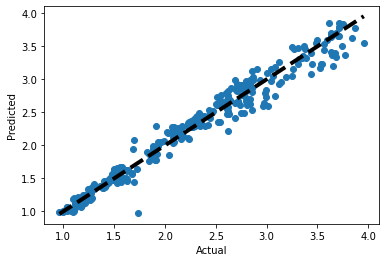

In [96]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_model)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

0.10827973380517165

### Deep Neural Network Model

In [98]:
#DNN Model 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

dnnModel = tf.keras.Sequential()

dnnModel.add(tf.keras.layers.Dense(128, input_shape=(6, ), activation='relu', name='dense_1', kernel_initializer='GlorotNormal'))
dnnModel.add(tf.keras.layers.Dense(64, activation='relu', name='dense_2'))
dnnModel.add(tf.keras.layers.Dense(32, activation='relu', name='dense_3'))
dnnModel.add(tf.keras.layers.Dense(12, activation='relu', name='dense_4'))
dnnModel.add(tf.keras.layers.Dense(1, activation='linear', name='dense_output'))

dnnModel.compile(loss='mean_squared_error', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(0.1))
dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               896       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
 dense_output (Dense)        (None, 1)                 13        
                                                                 
Total params: 11,641
Trainable params: 11,641
Non-trainable params: 0
_________________________________________________________________


In [99]:
#Train the model
history = dnnModel.fit(Xtrain, ytrain, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 9013501952.0000 - mae: 19032.3184
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 5.8892 - mae: 2.2601
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 3.0729 - mae: 1.5061
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 1.5063 - mae: 0.9736
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9608 - mae: 0.8201
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7968 - mae: 0.7658
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7604 - mae: 0.7478
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7537 - mae: 0.7432
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7527 - mae: 0.7425
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7526 - mae: 0.7422
Epoch 11/100
22/22 [==========================

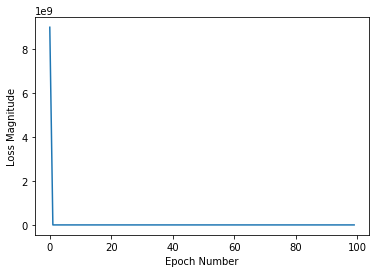

In [100]:
# Display Training Statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss']);

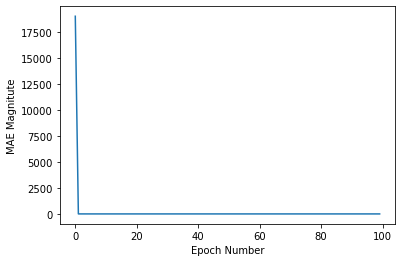

In [101]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("MAE Magnitute")
plt.plot(history.history['mae']);

In [102]:
# Evaluate the model
mse_nn, mae_nn = dnnModel.evaluate(Xtest,ytest)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

10/10 [==============================] - 0s 1ms/step - loss: 0.6545 - mae: 0.6894
Mean squared error on test data:  0.6545013189315796
Mean absolute error on test data:  0.689372181892395


In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

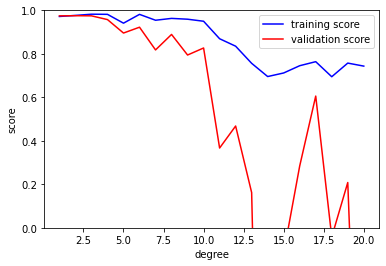

In [104]:
%matplotlib inline
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), Xtrain, ytrain,
                                          param_name = 'polynomialfeatures__degree', 
                                          param_range = degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [105]:
model_poly = PolynomialRegression(4).fit(Xtrain, ytrain)
y_poly = PolynomialRegression(4).fit(Xtrain, ytrain).predict(Xtest)

In [106]:
print(model_poly.score(Xtrain,ytrain))
print(model_poly.score(Xtest,ytest))

0.981774858472186
0.9661499598763421


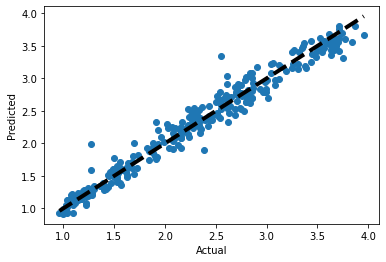

In [107]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_poly)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [108]:
mean_absolute_error(ytest, y_poly)

0.11036346631596716

## Model Comparison and Evaluation

<table>
<tr>
<td>Model Number </td>
<td>Model Description</td>
<td>R-Squared</td>
<td>Adjusted R-squared</td>
<td>Mean Absolute Error - Train</td>
<td>Mean Absolute Error - Test</td>
</tr>
<tr>
<td>1 </td>
<td>Null Model</td>
<td></td>
<td></td>
<td>0.73</td>
<td>0.72</td>
</tr>
<tr>
<td><b>2 </b></td>
<td><b>Linear Regression with all independent variables</b></td>
<td><b>0.9736</b></td>
<td><b>0.9734</b></td>
<td><b>0.1031485</b></td>
<td><b>0.1081121</b></td>
</tr>
<tr>
<td>3 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data & import data</td>
<td>0.703</td>
<td>0.7009 </td>
<td>0.3571621</td>
<td></td>
</tr>
<tr>
<tr>
<td>4 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data</td>
<td>0.6824</td>
<td>0.6806 </td>
<td>0.3745696</td>
<td></td>
</tr>
<tr>
<td>5 </td>
<td>LM with stocks, no of days of supply, and refinary capacity</td>
<td>0.6405</td>
<td>0.6389</td>
<td>0.4032406</td>
<td></td>
</tr>

<tr>
<td>6 </td>
<td>LM with stocks and no of days of supply</td>
<td>0.6027</td>
<td>0.6015</td>
<td>0.429309</td>
<td></td>
</tr>

<tr>
<td>7 </td>
<td>LM with only stocks as independent variable</td>
<td>0.5307</td>
<td>0.5301</td>
<td>0.4858075</td>
<td></td>
</tr>

<tr>
<td>8 </td>
<td>LM with stocks, no of days of supply, refinary capacity, export data and crude price</td>
<td>0.9735</td>
<td>0.9733 </td>
<td>0.1034463</td>
<td>0.1084135</td>
</tr>

<tr>
<td>9 </td>
<td>LM with crude price, stocks, no of days of supply and refinary capacity</td>
<td>0.9733</td>
<td>0.9731</td>
<td>0.1046638</td>
<td>0.1096322</td>
</tr>

<tr>
<td>10 </td>
<td>LM with crude price, stocks and no of days of supply</td>
<td>0.973</td>
<td>0.9728</td>
<td>0.1053172</td>
<td></td>
</tr>

<tr>
<td>11 </td>
<td>LM with crude price and stocks</td>
<td>0.9722</td>
<td>0.9721</td>
<td>0.1052105</td>
<td></td>
</tr>

<tr>
<td>12 </td>
<td>LM with only the crude price as independent variable</td>
<td>0.9404</td>
<td>0.9403</td>
<td>0.1704284</td>
<td></td>
</tr>

<tr>
<td>13 </td>
<td>LM with no of days of supply, refinery capacity, export data, import data and crude price</td>
<td>0.959</td>
<td>0.9587</td>
<td>0.1335655</td>
<td></td>
</tr>
  
<tr>
<td>14 </td>
<td>LM with no of days of supply, refinery capacity, export and import data</td>
<td>0.2573</td>
<td>0.2531</td>
<td>0.6063415</td>
<td></td>
</tr>

<tr>
<td>15 </td>
<td>LM with  no of days of supply, refinery capacity, and export data</td>
<td> 0.2573</td>
<td>0.2541</td>
<td>0.6064749</td>
<td></td>
</tr>

<tr>
<td>16 </td>
<td>LM with no of days of supply and refinery capacity</td>
<td>0.215</td>
<td>0.2127</td>
<td>0.6472869</td>
<td></td>
</tr>

<tr>
<td>17 </td>
<td>LM with no of days of supply as independent variable</td>
<td>0.01756</td>
<td>0.01616</td>
<td>0.725579</td>
<td></td>
</tr>

<tr>
<td>18 </td>
<td>LM with refinery capacity, crude price, stocks, no of days of supply and import data</td>
<td>0.9733</td>
<td>0.9731</td>
<td>0.1046834</td>
<td></td>
</tr>
    
<tr>
<td>19 </td>
<td>LM with refinery capacity and crude price</td>
<td>0.9404</td>
<td>0.9403</td>
<td>0.1700321</td>
<td></td>
</tr>

<tr>
<td>20 </td>
<td>LM with only refinery capacity as independent variable</td>
<td>0.143</td>
<td>0.1418</td>
<td>0.6769605</td>
<td></td>
</tr>
    
<tr>
<td>21 </td>
<td>Linear Regression Model using scikit-learn</td>
<td></td>
<td>0.9670</td>
<td></td>
<td>0.1082</td>
</tr>

<tr>
<td>22</td>
<td>Deep Neural Network Model</td>
<td></td>
<td></td>
<td>0.7509</td>
<td>0.6897</td>
</tr>
    
<tr>
<td>23 </td>
<td>Polynomial Regression</td>
<td></td>
<td>0.9661</td>
<td></td>
<td>0.1103</td>
</tr>
    
    
</table>